<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Exercises_Generate_new_features_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise - Preprocessing** `adult data`

**Outline:**
* Dataset description
* EDA
* Missing value & Outliers Exploration
* Data Splitting
* Preprocessing
* Binning
* Impute missing values
* Encoding
* Polynomial
* Model fitting and evaluation
* Model properties

**Dataset description**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

* Fields:
The dataset contains 16 columns
Target filed: Income

  * The income is divide into two classes: <=50K & >50K
Number of attributes: 14
  * These are the demographics and other
features to describe a person

**Instructions**
* drop columns: 'fnlwgt', 'education'
* use model : Logistic Regression

We will explore the possibility in predicting income level based on the individual’s personal information.

In [61]:
# Installing additional library
#!pip install category_encoders

In [2]:
# Initial setup
# Importing libraries

# data wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# scaling
from sklearn.preprocessing import RobustScaler

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn.metrics import mean_squared_error, root_mean_squared_error

## **Business understanding**

**Context**

In today's data-driven world, understanding the factors that influence an individual's income is crucial for various purposes, such as policymaking, business strategy, and personal financial management. With the availability of vast amounts of data, particularly in the demographic and socioeconomic domains, there is an opportunity to leverage analytics and machine learning to predict income levels based on personal information.

**Problem Statement**

The problem revolves around predicting an individual's income level based on their personal attributes such as education level, age, gender, occupation, and possibly other factors. By analyzing historical data, we want to build a predictive model that can generalize well to new individuals and accurately estimate their income bracket.

**Goals**

Create a machine learning model that can accurately predict an individual's income level based on their personal attributes.

**Analytic Approach**

Therefore, we need to analyze the data to identify which factors most influence income levels, thereby providing insight into socioeconomic dynamics.

Next, we will build a model that can accurately predict an individual's income level based on their personal attributes.

**Metric Evaluation**

The performance of the predictive model will be evaluated using accuracy metrics.



**Data Understanding**

The dataset describes 32,561 individuals.
Each row represents information/characteristics of an individual, such as age, education, occupation, and other information, along with income information.

In [3]:
# Loading dataset 'adult.csv'
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/adult.csv'
df_adult = pd.read_csv(url)
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Summary
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Dimension
df_adult.shape

(32561, 15)

**Attribute Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
|age | Integer | Age |
|workclass |Text | Working class |
|education.num | Integer | Education level |
|marital.status |Text | Marital status |
|occupation |Text | Type of employment |
|relationship |Text | Family status |
|race |Text | Ethnicity |
|sex |Text | Gender |
|capital.gain |Integer | Investment gain |
|capital.loss |Integer | Investment loss |
|hours.per.week |Integer | Hours worked per week |
|native.country |Text | Country of origin |
|income |Text | Income category |

In [6]:
df_adult.groupby('education')[['education.num']].mean().sort_values('education.num')

,education.num
education,
Preschool,1.0
1st-4th,2.0
5th-6th,3.0
7th-8th,4.0
9th,5.0
10th,6.0
11th,7.0
12th,8.0
HS-grad,9.0


In [7]:
data = df_adult.drop(columns=['fnlwgt', 'education']) # drop unnecessary columns

In [8]:
# Check data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'Missing values': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,Missing values,negative,n_unique,sample_unique
0,age,int64,0.0,False,73,"[90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 3..."
1,workclass,object,0.0,False,9,"[?, Private, State-gov, Federal-gov, Self-emp-..."
2,education.num,int64,0.0,False,16,"[9, 10, 4, 6, 16, 15, 13, 14, 7, 12, 11, 2, 3,..."
3,marital.status,object,0.0,False,7,"[Widowed, Divorced, Separated, Never-married, ..."
4,occupation,object,0.0,False,15,"[?, Exec-managerial, Machine-op-inspct, Prof-s..."
5,relationship,object,0.0,False,6,"[Not-in-family, Unmarried, Own-child, Other-re..."
6,race,object,0.0,False,5,"[White, Black, Asian-Pac-Islander, Other, Amer..."
7,sex,object,0.0,False,2,"[Female, Male]"
8,capital.gain,int64,0.0,False,119,"[0, 99999, 41310, 34095, 27828, 25236, 25124, ..."
9,capital.loss,int64,0.0,False,92,"[4356, 3900, 3770, 3683, 3004, 2824, 2754, 260..."


**Descriptive statistics**

In [9]:
display(data.describe(), data.describe(include='object'))

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


,workclass,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,7,15,6,5,2,42,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,14976,4140,13193,27816,21790,29170,24720


### **Exploratory Data Analysis (EDA)**

#### `Numerical Features`

**Data Distribution**

In [10]:
# Creating Numeric variable
numerical = [var for var in data.columns if data[var].dtypes != 'object']

In [11]:
# Normal test

# import library

from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df_adult[feature_name])

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,age,1526.010846,0.000000e+00,Not Normally Distributed
1,education.num,817.164145,3.589720e-178,Not Normally Distributed
2,capital.gain,55096.550375,0.000000e+00,Not Normally Distributed
3,capital.loss,29331.399856,0.000000e+00,Not Normally Distributed
4,hours.per.week,2508.918440,0.000000e+00,Not Normally Distributed


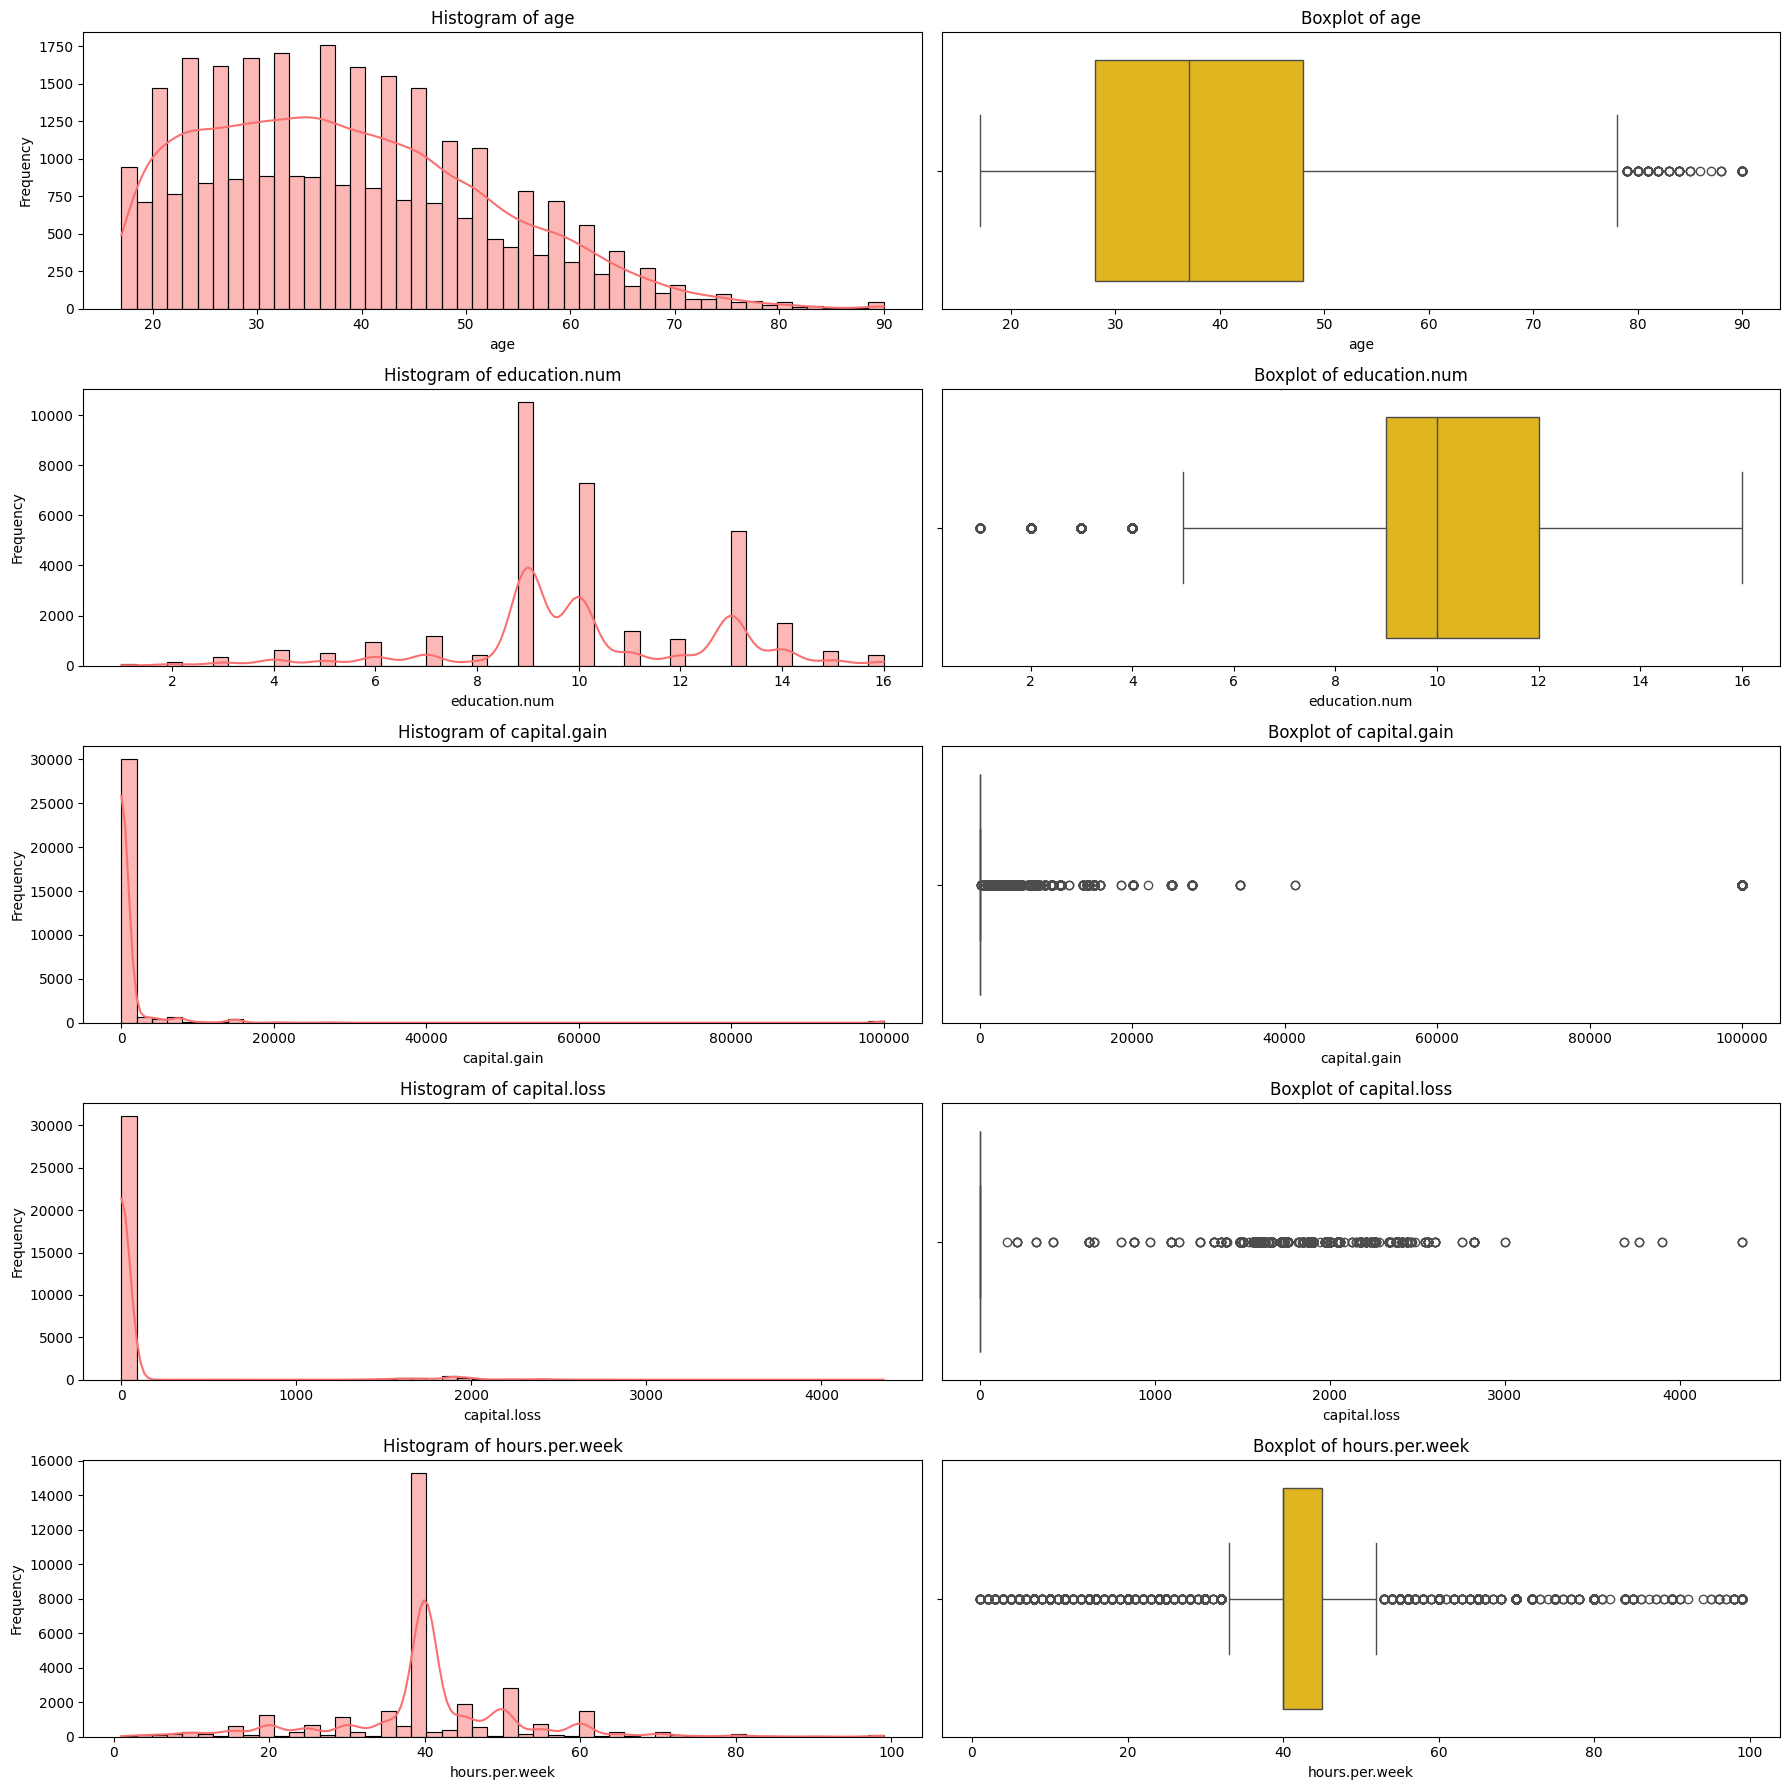

In [12]:
plt.figure(figsize=(18, 18))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Correlation**

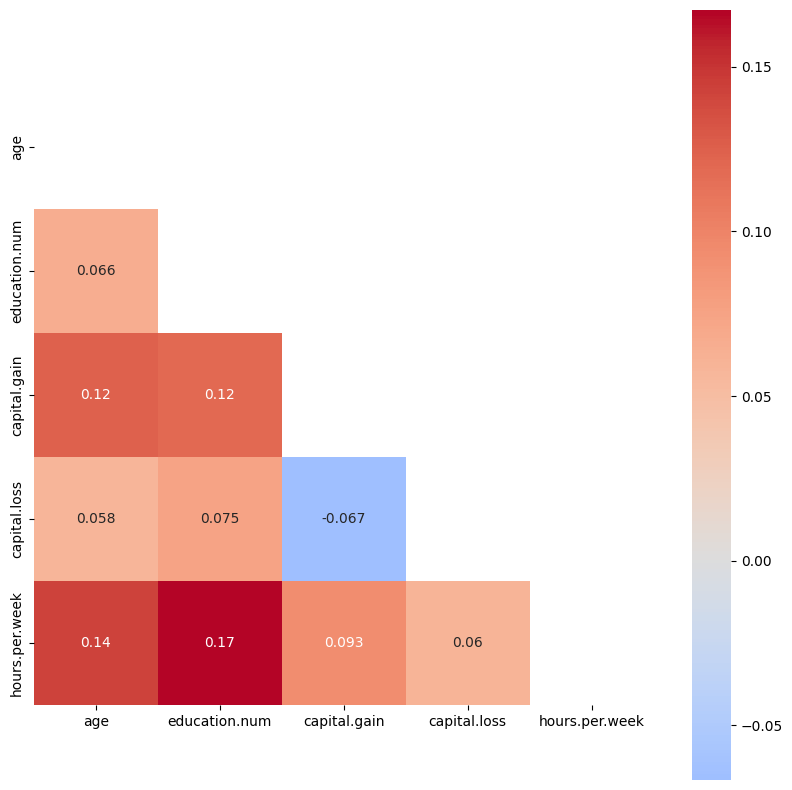

In [13]:
plt.figure(figsize=(10,10))

matrix = np.triu(data.select_dtypes(['int', 'float']).corr(method='spearman'))

sns.heatmap(data=data.select_dtypes(['int', 'float']).corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

**Feature vs Target**

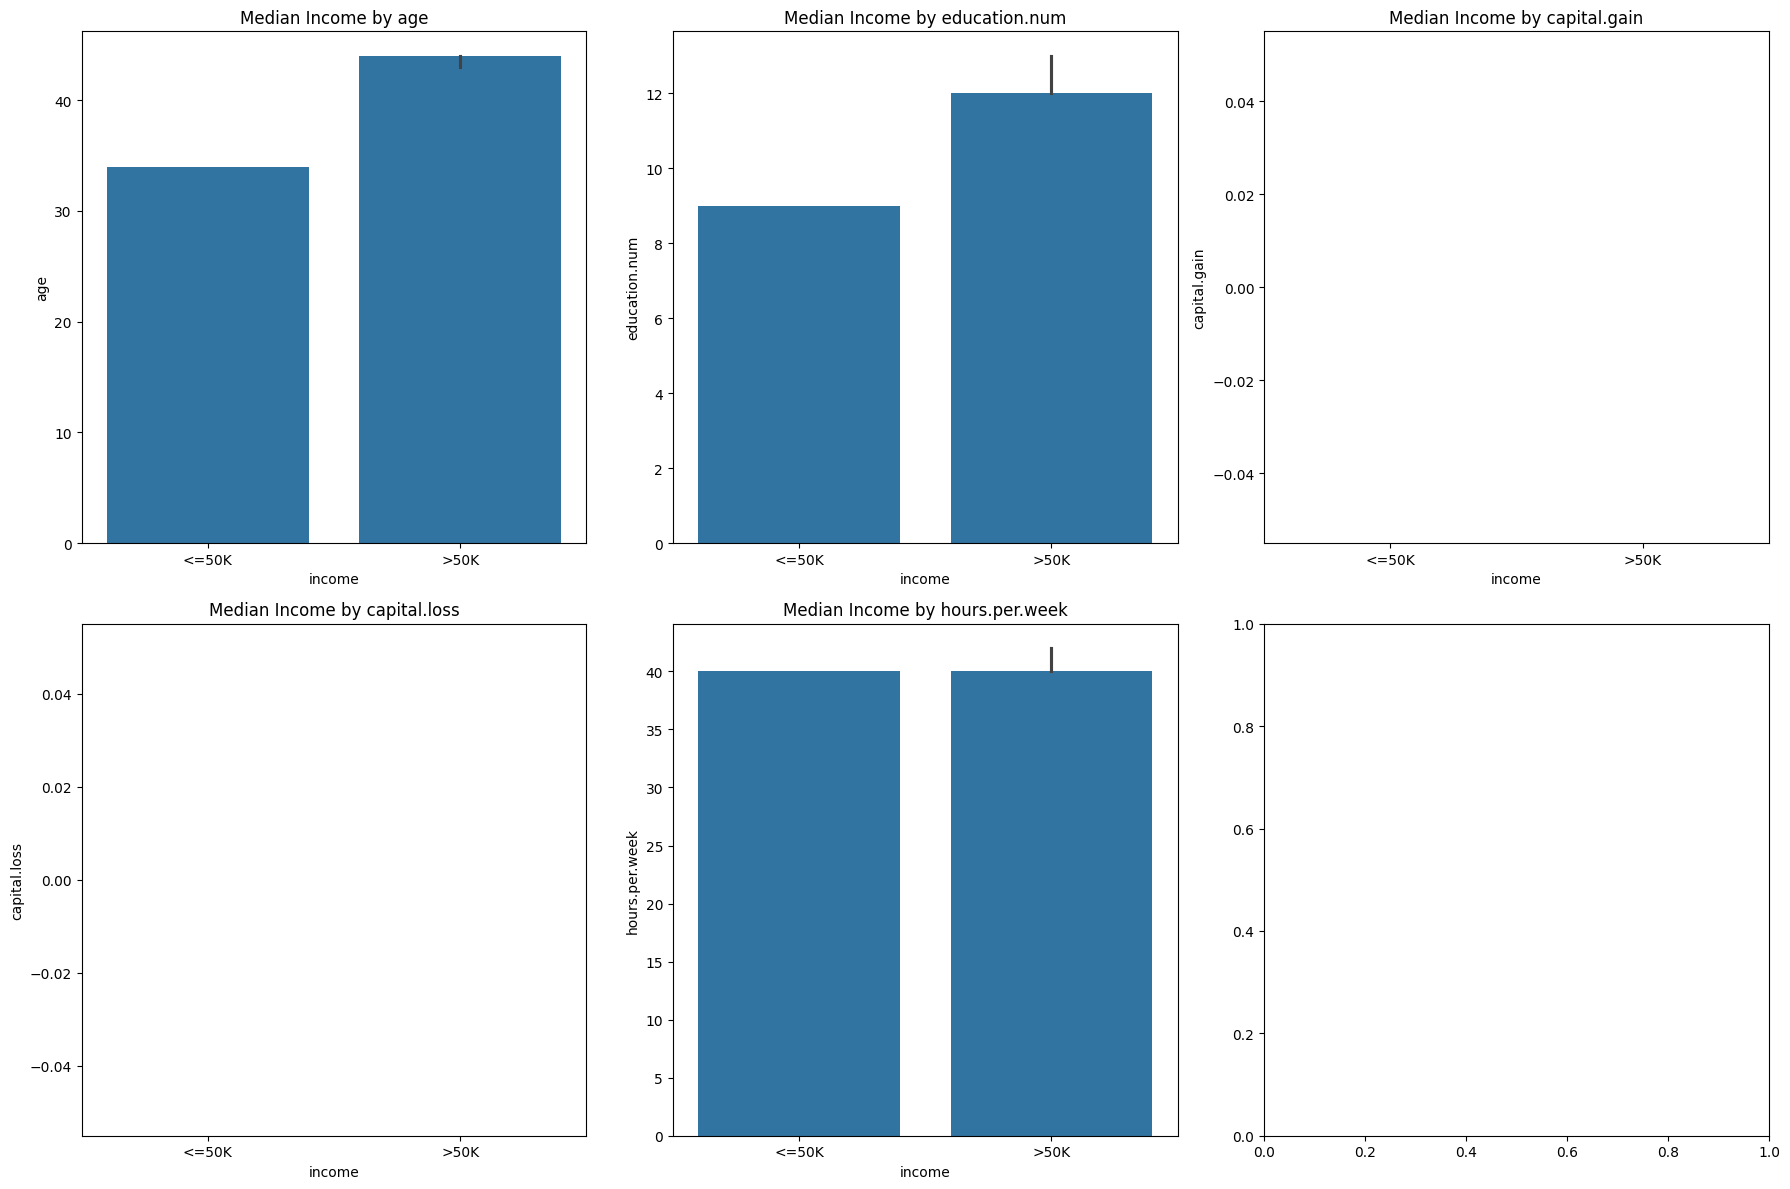

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18,12))

for col, j in zip(numerical, axes.flatten()):
    ax = sns.barplot(data=data, y= col, x='income', estimator=np.median, ax= j)
    ax.set_title(f'Median Income by {col}')

plt.tight_layout()
plt.show()

#### `Categorical Features`

**Distribution**

In [15]:
categorical = [var for var in data.drop(columns='native.country').columns if data[var].dtypes == 'object']

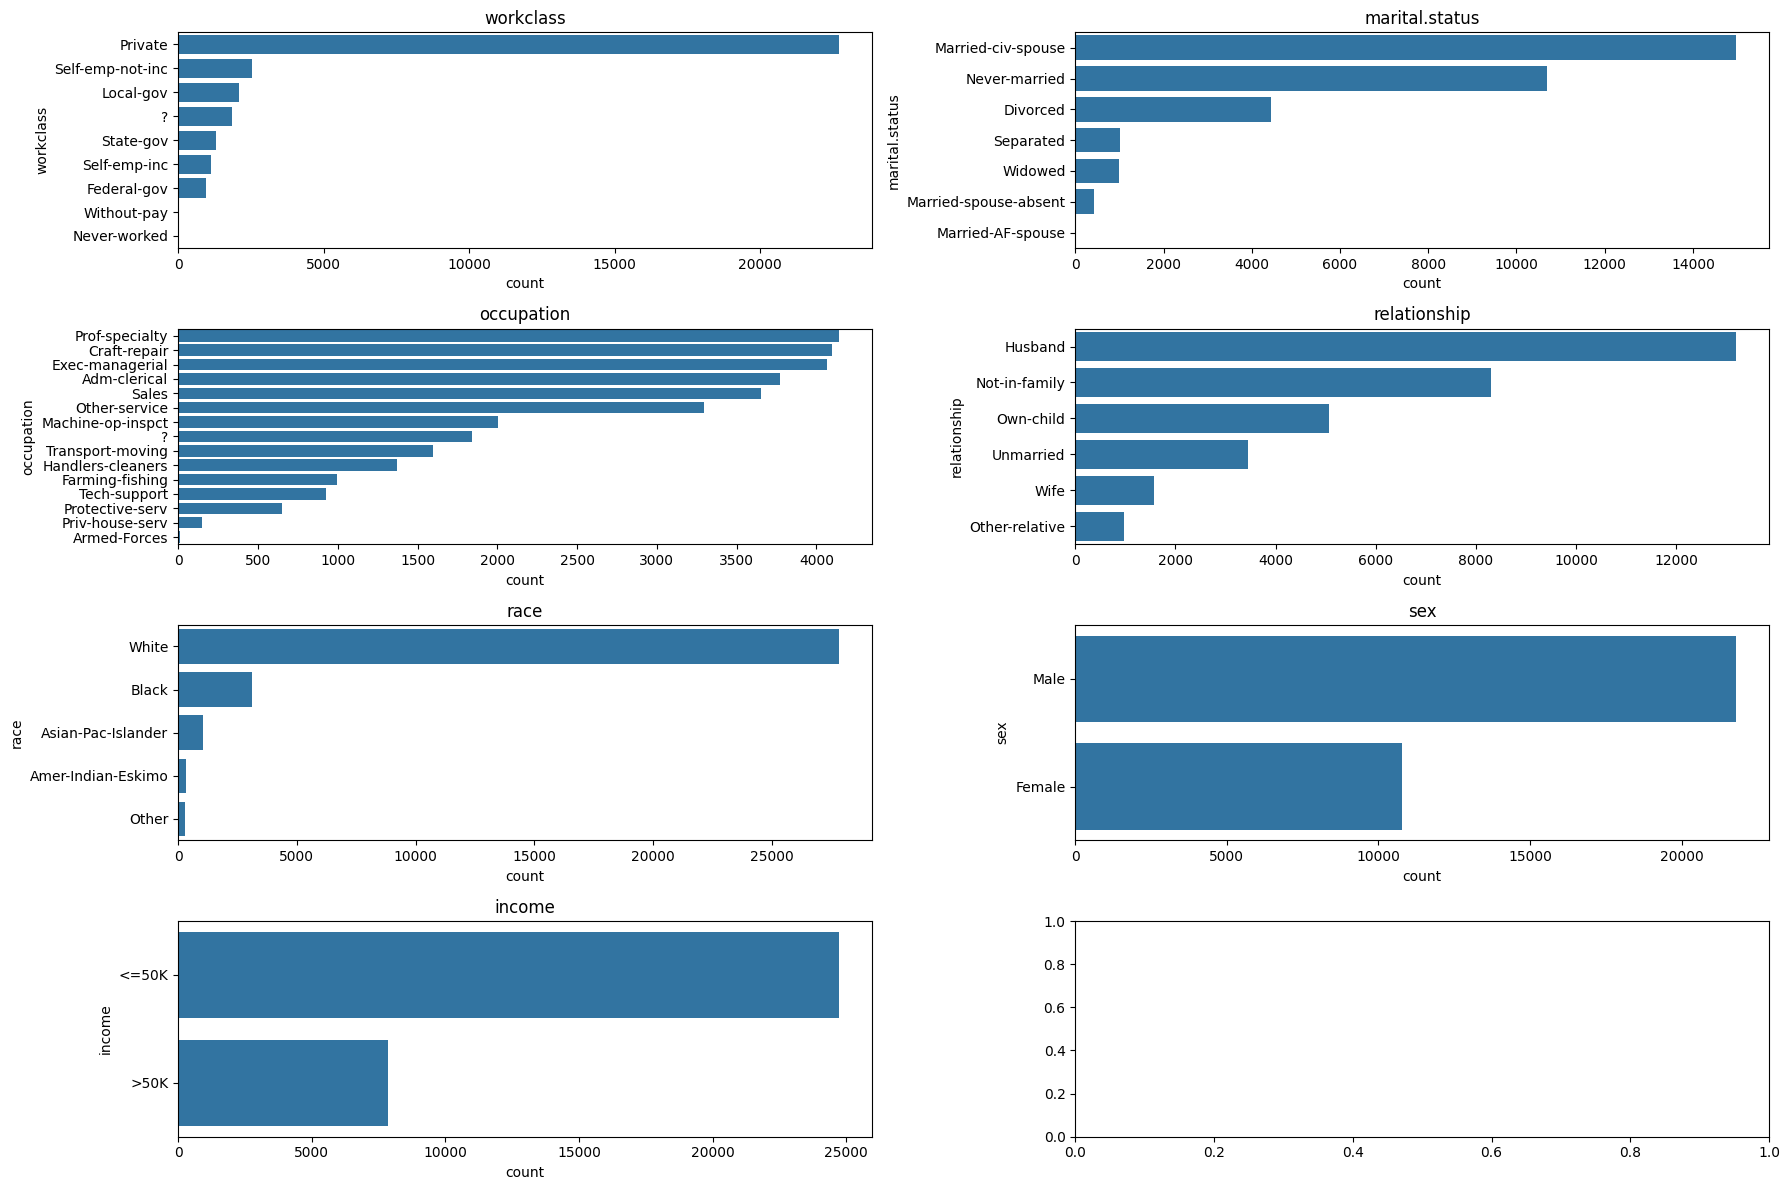

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(18, 12))
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12)

plt.tight_layout()
plt.show()

**Feature vs Target**

In [17]:
def create_plot(data, col):

    agg_table = data.groupby([col, 'income']).size().unstack().reset_index()
    agg_table['total'] = agg_table['>50K']+agg_table['<=50K']
    agg_table['% high income'] = (agg_table['>50K']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% high income', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% high income', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of high income clients by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='income', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of clients by {col} and income')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0,25000)

    plt.tight_layout()
    plt.show()

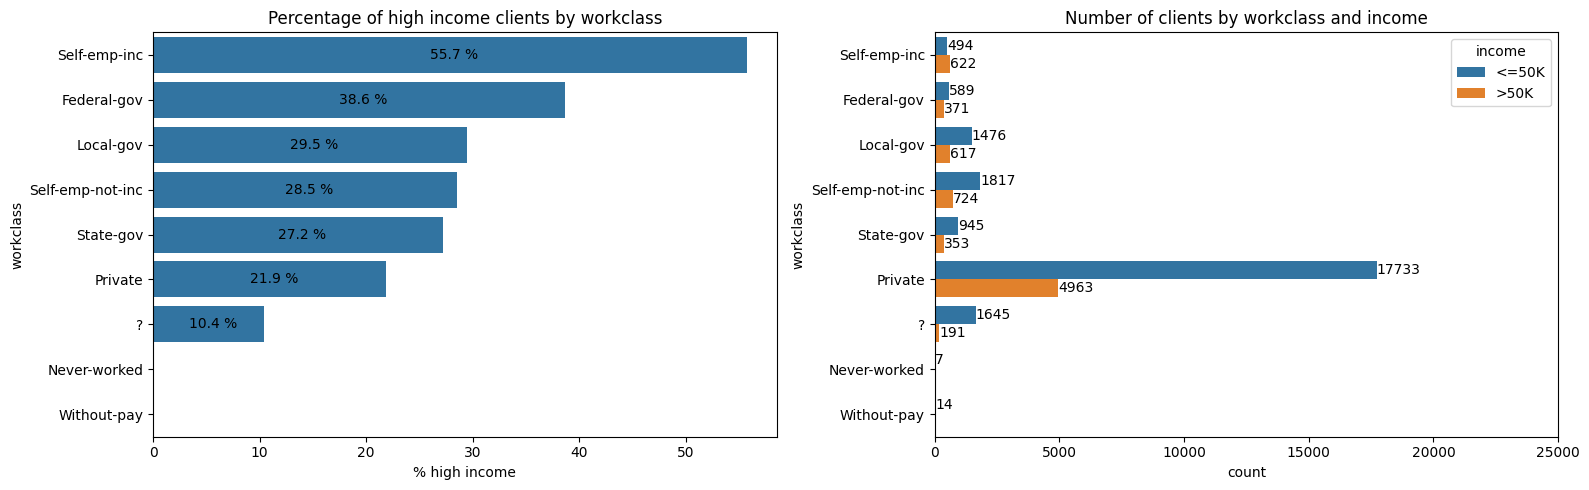

In [18]:
create_plot(data, 'workclass')

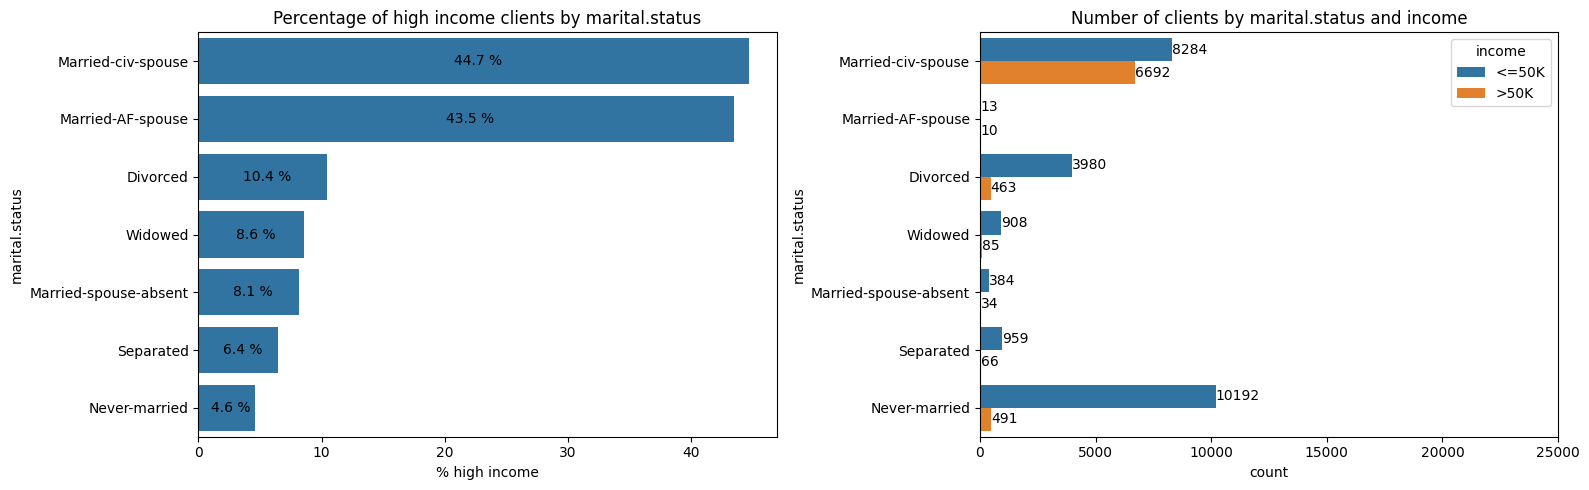

In [19]:
create_plot(data, 'marital.status')

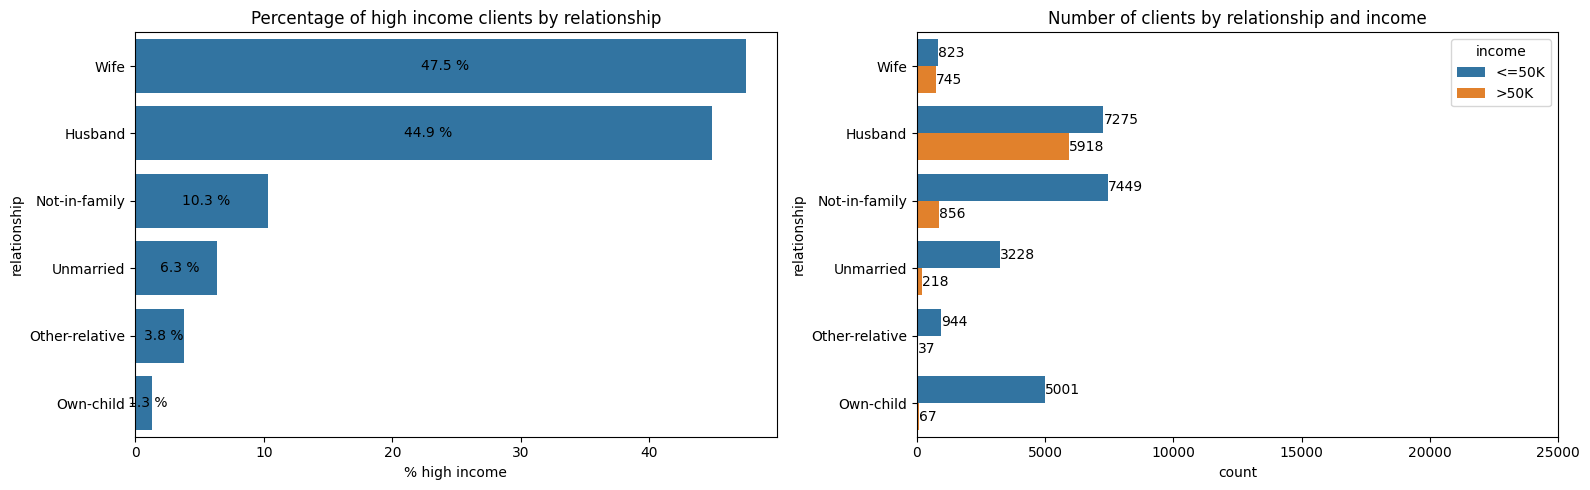

In [20]:
create_plot(data, 'relationship')

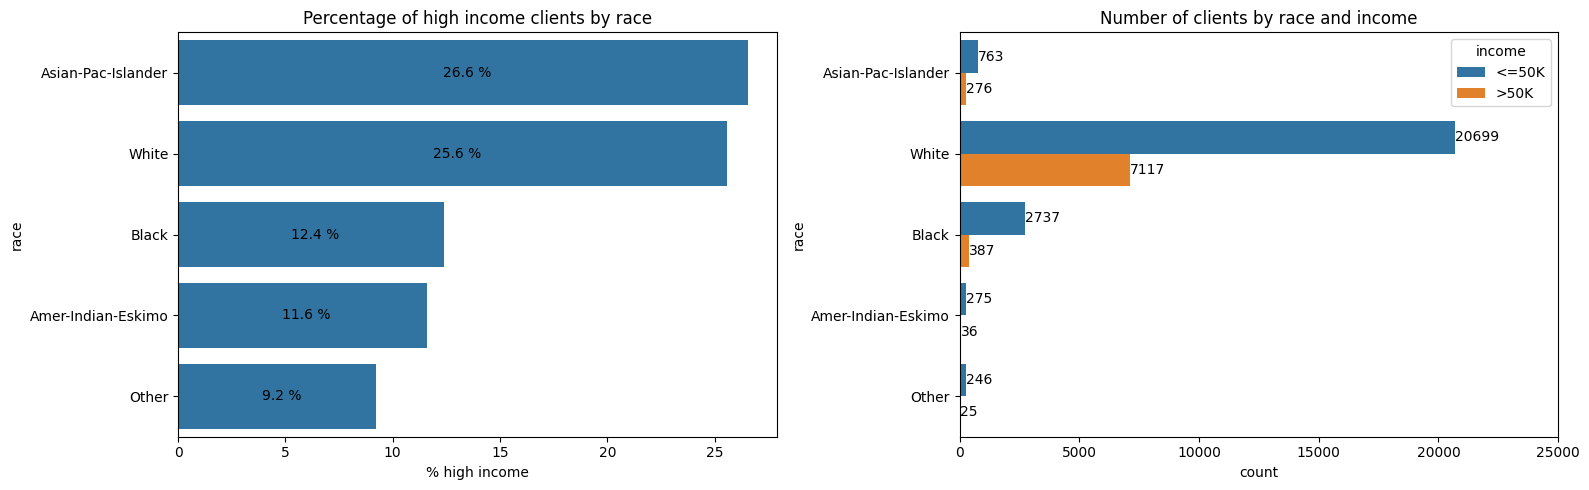

In [21]:
create_plot(data, 'race')

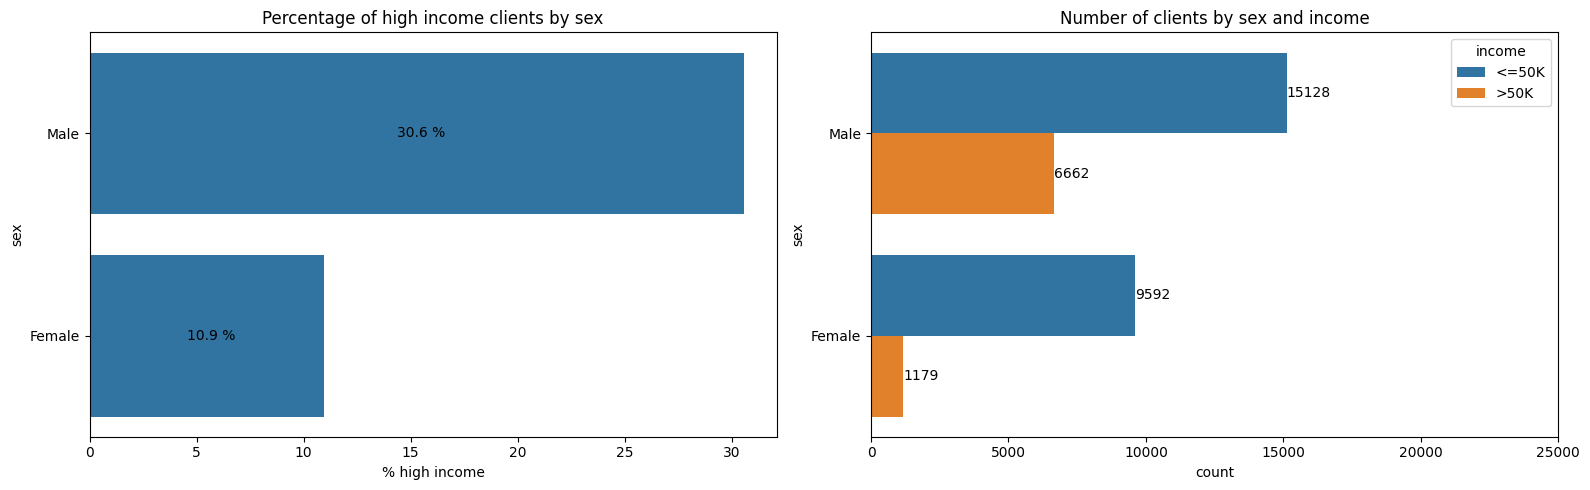

In [22]:
create_plot(data, 'sex')

### **Data Preprocessing**

#### `Duplicates`

In [23]:
print(f"Number of duplicated data: {data[data.duplicated()].shape}")
print(f'Percentage of {len(data[data.duplicated()])/len(data)*100:.2f}%')

Number of duplicated data: (3465, 13)
Percentage of 10.64%


Handling data duplication:

In [24]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

#### `Missing Values`

Upon initial inspection, no missing values ​​were observed in the dataset above.

However, upon closer inspection, the workclass, occupation, and native_country columns contain values ​​containing '?'.

We assume these '?' values ​​are missing values.

In [25]:
data = data.replace('?',np.nan)

In [26]:
pd.DataFrame({'missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,missing values
age,0
workclass,1632
education.num,0
marital.status,0
occupation,1639
relationship,0
race,0
sex,0
capital.gain,0
capital.loss,0


There are missing values ​​in the workclass, occupation, and native.country columns.

#### `Rare Labels`

Rare labels were found in the `native.country` column, some categories appear dominantly, while others only appear in a small amount of data. If rare labels are used, they can add noise, causing overfitting to the model.

In [27]:
def check_rare_label(col):
    temp_df = data[col].value_counts(normalize=True)

    plt.figure(figsize=(10, 5))
    fig = temp_df.plot.bar(rot=90)
    fig.set_xlabel(col)
    fig.set_ylabel(f'Percentage of {col}')
    fig.set_title(f'Proportion of {col}')

    plt.axhline(y=0.05, color='red', linestyle='--')
    plt.show()

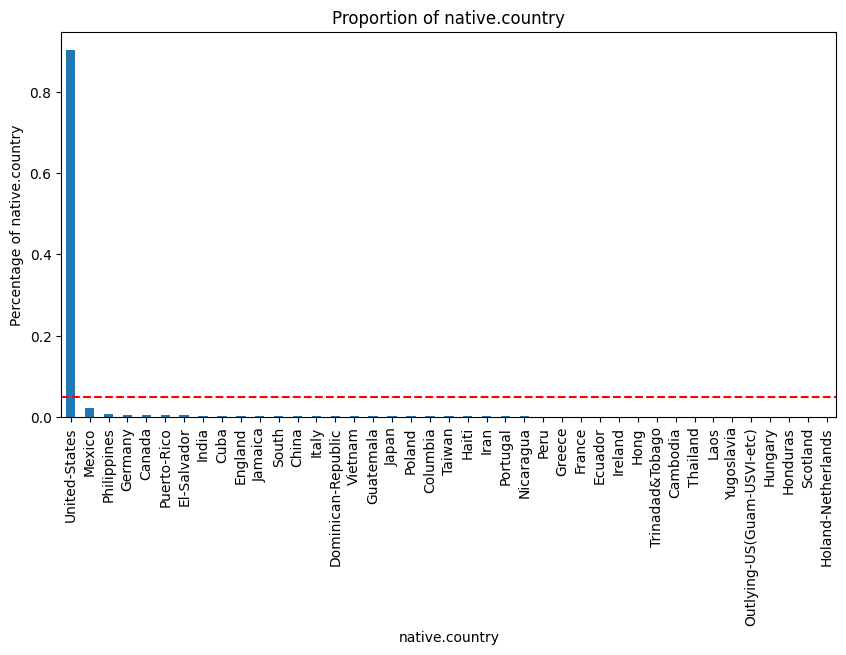

In [28]:
check_rare_label('native.country')

It can be seen that the majority of values ​​in this column contain the United States. However, none of the other unique values ​​reach 5%. Therefore, we will create a column containing 1 if the native country is from the United States and 0 if it is from outside the United States.

#### `Generate New Features`

***Is_UnitedStates***

In [29]:
data['Is_UnitedStates'] = np.where(data['native.country']=='United-States', 1, 0)
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Is_UnitedStates
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,1


***Investment_Result***

In [30]:
data['Investment_Result'] = data['capital.gain'] - data['capital.loss']
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Is_UnitedStates,Investment_Result
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1,-4356
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1,-4356
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1,-3900
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,1,-3900


#### `Remove Unused Features`

We will delete the `native.country` column because it is already represented by the `Is_UnitedStates` column.

In [31]:
data = data.drop(columns='native.country')
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,Is_UnitedStates,Investment_Result
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K,1,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,1,-4356
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K,1,-4356
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,1,-3900
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,1,-3900


We will delete the `capital.gain` and `capital.loss` columns because they are already represented by the `Investment_Result` column.

In [32]:
data = data.drop(columns=['capital.gain', 'capital.loss'])
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,Is_UnitedStates,Investment_Result
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,40,<=50K,1,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,1,-4356
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,40,<=50K,1,-4356
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K,1,-3900
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K,1,-3900


#### `Outliers`

In [34]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,age,141,0.48,-2.0,78.0
1,education.num,216,0.74,3.0,19.0
2,hours.per.week,8476,29.13,32.5,52.5
3,Is_UnitedStates,3375,11.60,1.0,1.0
4,Investment_Result,4209,14.47,0.0,0.0


There are outliers in the numerical column with percentages ranging from 0% to 29%. We will examine the proportion of targets in these outlier data.

In [35]:
proportion = []
indeces = []

for i, row in outlier_df.iterrows():
    outlier = data[(data[row['Column']] < row['Lower Bound']) | (data[row['Column']] > row['Upper Bound'])]
    percentages = (outlier['income'].value_counts(normalize=True)*100).values
    proportion.append(percentages)
    indeces.append(row['Column'])

pd.DataFrame(proportion, columns=['<=50K', '>50K'], index=indeces)

,<=50K,>50K
age,82.269504,17.730496
education.num,97.222222,2.777778
hours.per.week,78.869750,21.130250
Is_UnitedStates,80.177778,19.822222
Investment_Result,57.757187,42.242813


We found that the outliers in the 'age', 'education.num', and 'Investment_Result' columns have different proportions of '>50K' and '<=50K' in the 'income' column compared to the rest of the data. Therefore, we will not remove these outliers because they contain information that impacts the target.

We will retain the outlier in the 'hours.per.week' column, even though its proportion is not significantly different from the rest of the data, due to the large number of outliers.

We will apply winsorize with limits of 1% and 99% for the 'hours.per.week', 'education.num', and 'Investment_Result' columns. We will apply binning to the 'age' column.

#### `Collinearity`

In [36]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

We will carry out repeated testing until we obtain a VIF value < 10.

In [37]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [38]:
vif_df

,Feature,VIF
1,hours.per.week,7.132377
0,age,6.728038
2,Is_UnitedStates,6.287785
3,Investment_Result,1.026832


In [39]:
dropped_columns

['education.num']

#### `Cardinality`

In [40]:
categorical = [var for var in data.columns if data[var].dtypes == 'object']

In [41]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of workclass: 9
Cardinality of marital.status: 7
Cardinality of occupation: 15
Cardinality of relationship: 6
Cardinality of race: 5
Cardinality of sex: 2
Cardinality of income: 2


#### `Feature Engineering`

**Encoding**

Now let's encode the categorical features we have.

We will do the following:

1. Convert the features/columns `workclass, marital.status, relationship, race,` and `sex` using One Hot Encoding, as these features are not ordered/ordinal, and the number of unique data points is small.
2. Convert the feature/column `occupation` using Binary Encoding, as this feature is not ordered/not ordinal, but the number of unique data points is large.

**Scaling**

We will use the Robust Scaler because our data contains outliers, and the Robust Scaler will not be affected by outliers. We can reset the scaler later to find the best scaler.

**Change Value**

Let's first change the values ​​in the `income` column from '>50K' and '<=50K' to 1 and 0. Since our primary focus is on those with high incomes, then:

Target:

0: Income less than or equal to $50,000 per year (`income` == '<=50K')

1: Income greater than $50,000 per year (`income` == '>50K')

In [42]:
data['income'] = np.where(data['income']=='>50K',1,0)
data['income'].unique()

array([0, 1])

### **Modeling**

**Define Features (X) and Target (y)**

In [43]:
# feature
X = data.drop(columns='income')

# target
y = data['income']

**Data Splitting**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)

**Pipeline**

| Technique | Action |
| ----------------------------- | ----------- |
| Handling Outliers | Using winsorize with a 1% limit for the `hours.per.week` and `Investment_Result` columns|
| KBinDiscretizer | Binning the `age` column using a uniform strategy and ordinal encoding |
| Simple Imputer | Filling missing values ​​in the `workclass` and `occupation` columns using the most_frequent strategy |
| One Hot Encoding | Transforming the `workclass`, marital.status, relationship, race, and `sex` columns with unique values ​​<= 10 |
| Binary Encoding | Transforming the `occupation` column with unique values ​​> 10 |
| Robust Scaling | Scaling each feature using a robust scaler for the linear model|
| Polynomial Features | Create a new feature with degree 2 (Optional)|

In [45]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'),
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [46]:
# Outlier Handling
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from scipy.stats.mstats import winsorize
from typing import Literal

class HandlingOutliers(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self

    def transform(self, X, y=None):
        data = X.copy()
        data['hours.per.week'] = pd.Series(winsorize_with_pandas(data['hours.per.week'], limits=(0.01, 0.01)))
        data['Investment_Result'] = pd.Series(winsorize_with_pandas(data['Investment_Result'], limits=(0.01, 0.01)))
        return data

    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Pipeline
mode_binary = Pipeline([
    ('imputer_mode', SimpleImputer(strategy='most_frequent')),
    ('binary', BinaryEncoder())
])

mode_onehot = Pipeline([
    ('imputer_mode', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [48]:
from sklearn.preprocessing import KBinsDiscretizer

# Encoding and Imputer
transformer = ColumnTransformer([
    ('bin_ordinal', KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal'), ['age']),
    ('mode_binary', mode_binary, ['occupation']),
    ('mode_onehot', mode_onehot, ['workclass']),
    ('onehot', OneHotEncoder(drop='first'), ['marital.status','relationship','race', 'sex']),
], remainder='passthrough')

In [49]:
# Scaling
scaler = RobustScaler()

In [50]:
preprocess = Pipeline([
    ('outlier', HandlingOutliers()),
    ('transformer', transformer),
    ('scaler', scaler)
])

preprocess

Pipeline(steps=[('outlier', HandlingOutliers()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bin_ordinal',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  ['age']),
                                                 ('mode_binary',
                                                  Pipeline(steps=[('imputer_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['occupation']),
                                                 ('mode_onehot',
                                                  Pipeline(steps=[('imputer_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['workclass']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital.status',
                                                   'relationship', 'race',
                                                   'sex'])])),
                ('scaler', RobustScaler())])

In [51]:
# .fit
preprocess.fit(X_train)

# .transform method
X_train_prep = preprocess.transform(X_train)
X_test_prep = preprocess.transform(X_test)

`Get Col Names`

In [52]:
col_names = list(transformer.transformers_[0][1].get_feature_names_out()) + \
    list(transformer.transformers_[1][1][1].get_feature_names()) + \
    list(transformer.transformers_[2][1][1].get_feature_names_out()) + \
    list(transformer.transformers_[3][1].get_feature_names_out()) + \
    list(X.columns[transformer.transformers_[4][2]])

col_names

/tmp/ipython-input-3579960990.py:2: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  list(transformer.transformers_[1][1][1].get_feature_names()) + \
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


['age',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 'x0_Local-gov',
 'x0_Never-worked',
 'x0_Private',
 'x0_Self-emp-inc',
 'x0_Self-emp-not-inc',
 'x0_State-gov',
 'x0_Without-pay',
 'marital.status_Married-AF-spouse',
 'marital.status_Married-civ-spouse',
 'marital.status_Married-spouse-absent',
 'marital.status_Never-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Male',
 'education.num',
 'hours.per.week',
 'Is_UnitedStates',
 'Investment_Result']

In [53]:
X_train_prep = pd.DataFrame(data=X_train_prep, columns=col_names)
X_train_prep.head()

,age,0_0,0_1,0_2,0_3,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,education.num,hours.per.week,Is_UnitedStates,Investment_Result
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0,0.0,0.0
1,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.0
3,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.0,0.0,-2.00,0.0,-1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,-0.25,-1.2,0.0,0.0


In [54]:
X_test_prep = pd.DataFrame(data=X_test_prep, columns=col_names)
X_test_prep.head()

,age,0_0,0_1,0_2,0_3,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,education.num,hours.per.week,Is_UnitedStates,Investment_Result
0,-0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.75,0.0,0.0,0.0
1,-0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,-1.0,0.0
2,-0.5,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.0,-1.0,-0.25,0.0,0.0,0.0
3,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,-0.25,-1.4,0.0,0.0
4,-0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.50,0.0,0.0,0.0


`Model Benchmarking`

**Without Polynomial**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
import time

start = time.time()

# define model
logreg = LogisticRegression(max_iter=10000)

# fitting
logreg.fit(X_train_prep, y_train)

end = time.time()


Prediction on the test set using logistic regression

In [57]:
y_pred = logreg.predict(X_test_prep)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.5f}')
print(f'Fitting Time: {end - start:.2f}s')

Accuracy: 0.83385
Fitting Time: 40.43s


**With Polynomial**

In [58]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features
polynomial = PolynomialFeatures(degree=2)

# fit and transform to unscaled feature
X_train_prep_poly = polynomial.fit_transform(X_train_prep)
X_test_prep_poly = polynomial.transform(X_test_prep)

# create dataframe from array
X_train_prep_poly = pd.DataFrame(X_train_prep_poly, columns=polynomial.get_feature_names_out())
X_test_prep_poly = pd.DataFrame(X_test_prep_poly, columns=polynomial.get_feature_names_out())

In [59]:
start = time.time()

# define model
logreg = LogisticRegression(max_iter=10000)

# fitting
logreg.fit(X_train_prep_poly, y_train)

end = time.time()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction on the test set using logistic regression

In [60]:
y_pred = logreg.predict(X_test_prep_poly)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.5f}')
print(f'Fitting Time: {end - start:.2f}s')

Accuracy: 0.79227
Fitting Time: 384.93s
